In [4]:
import numpy as np

## 1. How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

Number of multiplications in a row = (Number of elements in one row in first matrix) = k

Total number of elements in the product = $ n X m $ 

Total number of multiplications = $ n X m X k $


Number of additions in a row = (Number of elements in one row in first matrix) - 1 = k - 1

Total number of elements in the product =$ n X m $

Total number of multiplications = $ n X m X (k - 1) $

## 2. Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

In [2]:
def matrix_multiplication(matrix1,matrix2,n,k,m):
    matrix3=np.zeros((n,m))
    for i in range(n):
        for j in range(m):
            sum=0
            for t in range(k):
                sum = sum+ matrix1[i][t] * matrix2[t][j]
            matrix3[i,j] = sum
    return matrix3

In [3]:
n,k,m = 30,40,20

matrix1 = [[col for col in range(k)] for row in range(n)]
matrix2 = [[col for col in range(m)] for row in range(k)]

# print(matrix1, '\n\n', matrix2, '\n')

out = matrix_multiplication(matrix1,matrix2,n,k,m)
# print(out)
%timeit matrix_multiplication(matrix1, matrix2, n,k,m)

3.83 ms ± 580 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [4]:
def matrix_multiplication_using_numpy(matrix1,matrix2,n,k,m):
    matrix3 = np.zeros((n,m),dtype='int')
    for i in range(n):
        matrix3[i] = np.add.reduce(matrix1[i] * matrix2.T,axis=1)
    return matrix3

In [5]:
rng=np.random.RandomState(2)

n,k,m = 30,40,20

matrix1 = rng.randint(1,12,(n,k))
matrix2 = rng.randint(13,20,(k,m))
# print(matrix1,'\n\n', matrix2,'\n')

matrix3 = matrix_multiplication_using_numpy(matrix1, matrix2, n,k,m )
# print('Matrix Multiplication\n',matrix3)
%timeit matrix_multiplication_using_numpy(matrix1, matrix2, n,k,m)

245 µs ± 21.1 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


Matrix multiplication using numpy is faster than lists because numpy stores the elements in a contiguous memory while lists store elements in non-contiguous memory. Because of which there are more number of memory access in lists than in numpy array. 

## 3. Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

In [6]:
def finding_median(num):
    tot = len(num)
    
    if tot%2==0:
        flag = 'even'
        med = tot//2 + 1
    else:
        flag = 'odd'
        med = tot//2
        
    for i in range(med):
        max = 0
        for j in range(tot - i):
               if(num[j]>num[max]):
                    max = j
                    
        temp = num[-1 - i]
        num[-1 - i] = num[max]
        num[max] = temp
        
    if flag == 'even':
        return (num[med] + num[med - 1])/2
    else:
        return num[med]

In [15]:
num = np.random.randint(1,100000,10000)
%timeit finding_median(num)

8.94 s ± 252 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [8]:
def finding_median_after_sorting(num):
    num.sort()
    tot = len(num)
    med = tot//2
    if tot%2 == 0:
        return (num[med] + num[med + 1])/2
    else:
        return num[med]

In [16]:
num = np.random.randint(1,100000,10000)
median = finding_median_after_sorting(num)
%timeit finding_median_after_sorting(num)

66.4 µs ± 3.49 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [17]:
num = np.random.randint(1,100000,10000)
%timeit np.median(num)

83.6 µs ± 5.2 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


## 4. What is the gradient of the following function with respect to x and y?

$$
x^2y + y^3\sin(x)
$$

Gradient with respect to x
$$ \frac{d}{dx}(x^2y+y^3\sin(x)) $$
$$ = y\frac{d}{dx}x^2 + y^3\frac{d}{dx}\sin(x)$$
$$ = 2xy+y^3\cos(x)$$


Gradient with respect to y
$$ \frac{d}{dy}(x^2y+y^3\sin(x)) $$
$$ = x^2\frac{d}{dy}y + \sin(x)\frac{d}{dy}y^3$$
$$ = x^2 + 3y^2\sin(x)$$

## 5. Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y

In [41]:
import jax.numpy as jnp
from jax import grad, random

def fun(m,n):
    return m**2*n+n**3*jnp.sin(m)

dfdx = grad(fun, argnums = 0)
print('Differentiating with respect to x at x = 1.0 & y = 2.0: ',dfdx(1.0,2.0))

dfdx = grad(fun, argnums = 1)
print('Differentiating with respect to y at x = 1.0 & y = 2.0:',dfdx(1.0,2.0))

Differentiating with respect to x at x = 1.0 & y = 2.0:  8.322418
Differentiating with respect to y at x = 1.0 & y = 2.0: 11.0976515


In [38]:
x = 1.0
y = 2.0
print(2*x*y+y**3*np.cos(x))

print(x**2 + 3*y**2*np.sin(x))

8.322418446945118
11.097651817694757


## 6. Use sympy to confirm that you obtain the same gradient analytically.

In [177]:
from sympy import *
x, y = symbols('x y')
init_printing(use_unicode=True)
print('Differentiating with respect to x')
diff(x**2*y+y**3*sin(x), x)

Differentiating with respect to x


In [176]:
print('Differentiating with respect to y')
diff(x**2*y+y**3*sin(x), y)

Differentiating with respect to y


## 7. Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks. Something like:

2022
Branch 1
Roll Number: 1, Name: N, Marks:
Maths: 100, English: 70 …
Branch 2
2023
Branch 1
Branch 2
2024
Branch 1
Branch 2
2025
Branch 1
Branch 2


In [79]:
stu_marks = {'2022':
                 {'Branch1':
                      [{'RollNo':1,
                       'Name':'Student 1',
                       'Marks':
                           {'Maths':100,
                            'English':70}
                       }],
                  'Branch2':{}
                 },
            '2023':
                 {'Branch1':{},
                  'Branch2':{}
                 },
            '2024':
                 {'Branch1':{},
                  'Branch2':{}
                 },
            '2025':
                 {'Branch1':{},
                  'Branch2':{}
                 }
             
            }
stu_marks

{'2022': {'Branch1': [{'RollNo': 1,
    'Name': 'Student 1',
    'Marks': {'Maths': 100, 'English': 70}}],
  'Branch2': {}},
 '2023': {'Branch1': {}, 'Branch2': {}},
 '2024': {'Branch1': {}, 'Branch2': {}},
 '2025': {'Branch1': {}, 'Branch2': {}}}

## 8. Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

In [99]:
class Student:
    def __init__(self,rollno,name,marks):
        self.rollno = rollno
        self.name = name
        self.marks = marks

        
class Branch:
    def __init__(self,branch):
        self.branch = branch
        self.students = []
        self.total = {}
        
    def add_student(self,stu):
        self.students.append({'RollNo':stu.rollno,'Name':stu.name,'Marks':stu.marks})
        self.total[self.branch] = self.students
        return self.total

class Year:
    def __init__(self,year):
        self.year = year
        self.branches = {}
        self.total = {}
        
    def add_branch(self,branch):
        self.branches.update(branch)
        self.total[self.year] = self.branches
        return self.total

class Database:
    def __init__(self):
        self.db = {}
    
    def add_db(self, year):
        self.db.update(year)
        return self.db
        
#Students of Branch1        
s1 = Student(1,'Student1',{'Maths':40,'English':30})
b = Branch('Branch1')
b.add_student(s1)
s2 = Student(2,'Student2',{'Maths':40,'English':30})
r = b.add_student(s2)

y = Year(2022)
y.add_branch(r)

#Students of Branch2
s1 = Student(1,'Student1',{'Maths':40,'English':30})
b = Branch('Branch2')
b.add_student(s1)
s2 = Student(2,'Student2',{'Maths':40,'English':30})
r = b.add_student(s2)
#Branch of Year 2022
k = y.add_branch(r)

db = Database()
db.add_db( k )


#Students of Branch1        
s1 = Student(1,'Student1',{'Maths':40,'English':30})
b = Branch('Branch1')
b.add_student(s1)
s2 = Student(2,'Student2',{'Maths':40,'English':30})
r = b.add_student(s2)

y = Year(2023)
y.add_branch(r)

#Students of Branch2
s1 = Student(1,'Student1',{'Maths':40,'English':30})
b = Branch('Branch2')
b.add_student(s1)
s2 = Student(2,'Student2',{'Maths':40,'English':30})
r = b.add_student(s2)
#Branch of Year 2023
k = y.add_branch(r)

db.add_db( k )

{2022: {'Branch1': [{'RollNo': 1,
    'Name': 'Student1',
    'Marks': {'Maths': 40, 'English': 30}},
   {'RollNo': 2, 'Name': 'Student2', 'Marks': {'Maths': 40, 'English': 30}}],
  'Branch2': [{'RollNo': 1,
    'Name': 'Student1',
    'Marks': {'Maths': 40, 'English': 30}},
   {'RollNo': 2, 'Name': 'Student2', 'Marks': {'Maths': 40, 'English': 30}}]},
 2023: {'Branch1': [{'RollNo': 1,
    'Name': 'Student1',
    'Marks': {'Maths': 40, 'English': 30}},
   {'RollNo': 2, 'Name': 'Student2', 'Marks': {'Maths': 40, 'English': 30}}],
  'Branch2': [{'RollNo': 1,
    'Name': 'Student1',
    'Marks': {'Maths': 40, 'English': 30}},
   {'RollNo': 2, 'Name': 'Student2', 'Marks': {'Maths': 40, 'English': 30}}]}}

## 9. Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.

In [2]:
import matplotlib.pyplot as plt

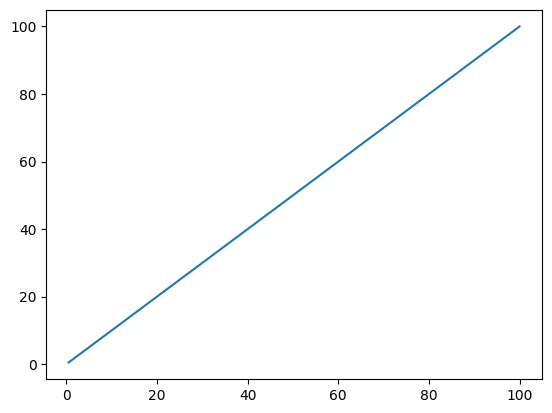

In [47]:
#y = x

x = np.arange(1,201)
x = x/2
y1 = x
plt.plot(x , y1)

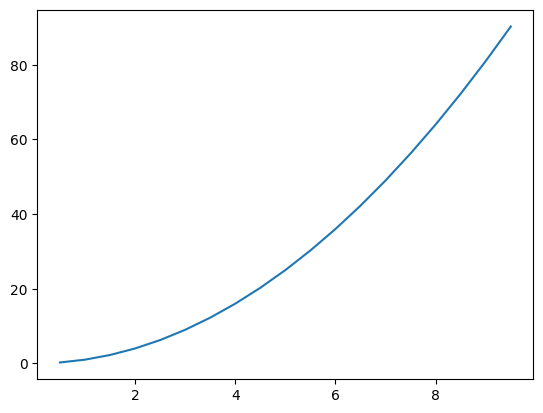

In [48]:
# y = x*x
x = np.arange(1,201)
x = x/2
y=x*x
plt.plot(x , y)

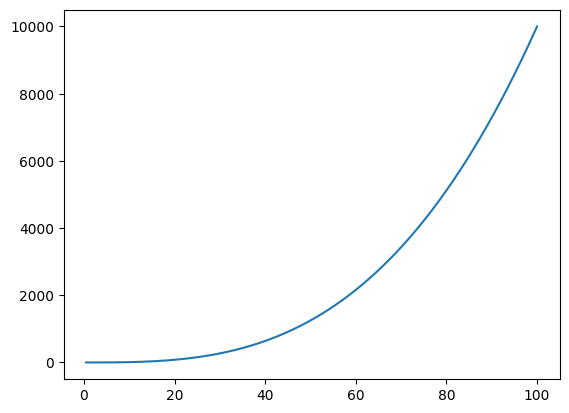

In [41]:
y = (x*x*x)/100
plt.plot(x , y)

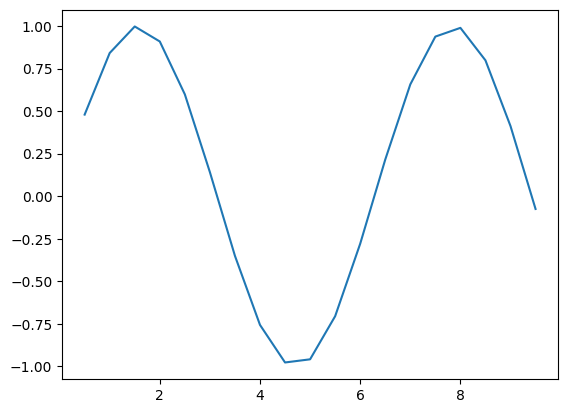

In [49]:
y = np.sin(x)
plt.plot(x,y)

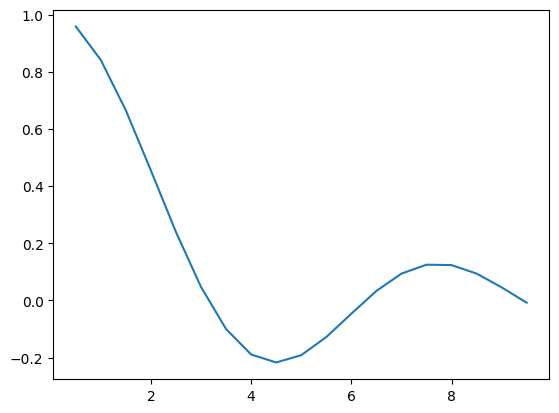

In [50]:
y = np.sin(x) / x
plt.plot(x,y)

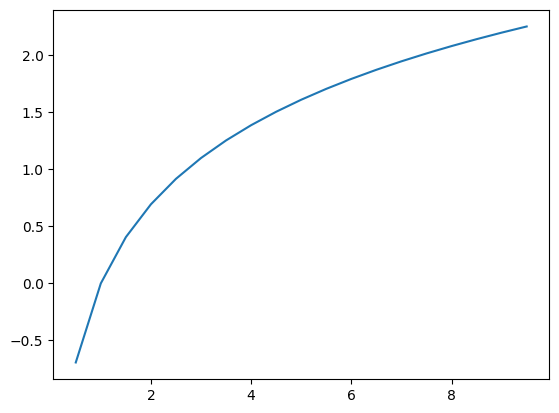

In [51]:
y = np.log(x)
plt.plot(x ,  y)

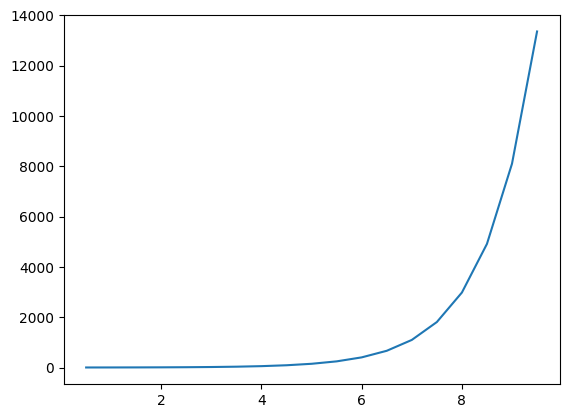

In [53]:
y = np.exp(x)
plt.plot(x , y)

## 10. Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

In [87]:
import pandas as pd
matrix20by5 = np.random.uniform(1,2,(20,5))
df = pd.DataFrame(matrix20by5, columns = ['a','b','c','d','e'])
dfmin=df.mean(axis = 1).argmin()
dfmax=df.std(axis = 0).argmax()
print('Dataframe\n',df,'\n')
print('Column with highest Standard deviation: ',dfmax,'\t', 'Row with lowest mean: ',dfmin)

Dataframe
            a         b         c         d         e
0   1.985508  1.764329  1.688401  1.563127  1.355925
1   1.520309  1.823766  1.469232  1.695501  1.822942
2   1.695177  1.730204  1.324141  1.736408  1.977167
3   1.825850  1.329269  1.884393  1.765336  1.624951
4   1.466299  1.762188  1.924624  1.933195  1.418064
5   1.680932  1.420339  1.537208  1.229902  1.412667
6   1.298672  1.231848  1.650938  1.331979  1.919129
7   1.192117  1.637496  1.297408  1.401359  1.577081
8   1.758849  1.372867  1.050061  1.294228  1.459766
9   1.644283  1.579055  1.594805  1.621842  1.359368
10  1.153081  1.686939  1.812532  1.223365  1.056101
11  1.451182  1.375395  1.256230  1.710395  1.795837
12  1.515343  1.650181  1.179873  1.421039  1.422790
13  1.703784  1.951284  1.917336  1.578577  1.774464
14  1.059532  1.570016  1.125307  1.126026  1.878275
15  1.646657  1.366028  1.521037  1.475123  1.661521
16  1.466039  1.188670  1.497133  1.443654  1.410729
17  1.407914  1.044854  1.021887  1

## 11. Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

In [127]:
df['f'] = df.sum(axis = 1)
df

,a,b,c,d,e,f
0,1.985508,1.764329,1.688401,1.563127,1.355925,8.357289
1,1.520309,1.823766,1.469232,1.695501,1.822942,8.331750
2,1.695177,1.730204,1.324141,1.736408,1.977167,8.463097
3,1.825850,1.329269,1.884393,1.765336,1.624951,8.429799
4,1.466299,1.762188,1.924624,1.933195,1.418064,8.504370
5,1.680932,1.420339,1.537208,1.229902,1.412667,7.281048
6,1.298672,1.231848,1.650938,1.331979,1.919129,7.432567
7,1.192117,1.637496,1.297408,1.401359,1.577081,7.105462
8,1.758849,1.372867,1.050061,1.294228,1.459766,6.935771
9,1.644283,1.579055,1.594805,1.621842,1.359368,7.799353


In [130]:
df['g'] = np.where(df['f'] < 8, 'LT8', 'GT8')
df

,a,b,c,d,e,f,g
0,1.985508,1.764329,1.688401,1.563127,1.355925,8.357289,GT8
1,1.520309,1.823766,1.469232,1.695501,1.822942,8.331750,GT8
2,1.695177,1.730204,1.324141,1.736408,1.977167,8.463097,GT8
3,1.825850,1.329269,1.884393,1.765336,1.624951,8.429799,GT8
4,1.466299,1.762188,1.924624,1.933195,1.418064,8.504370,GT8
5,1.680932,1.420339,1.537208,1.229902,1.412667,7.281048,LT8
6,1.298672,1.231848,1.650938,1.331979,1.919129,7.432567,LT8
7,1.192117,1.637496,1.297408,1.401359,1.577081,7.105462,LT8
8,1.758849,1.372867,1.050061,1.294228,1.459766,6.935771,LT8
9,1.644283,1.579055,1.594805,1.621842,1.359368,7.799353,LT8


In [133]:
(df['g']=='LT8').sum()

14

In [136]:
df1 = df.groupby(by = 'g')['f'].std()
df1

g
GT8    0.217239
LT8    0.440459
Name: f, dtype: float64

## 12. Write a small piece of code to explain broadcasting in numpy.

In [151]:
arr1 = np.random.randn(5)
print('arr1 ',arr1)
arr2 = np.random.randn(1,5)
print('arr2 ',arr2)
arr3 = arr1 + arr2
print('arr3 ',arr3)
arr3.shape

arr1  [-2.02561713  0.22777206 -1.36498684 -1.66359813  0.56692919]
arr2  [[-1.50440134 -1.37866156 -0.71157696  0.98307654  1.96917966]]
arr3  [[-3.53001846 -1.1508895  -2.0765638  -0.68052159  2.53610885]]


(1, 5)

## 13. Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [139]:
def arg_min(arr):
    tot = len(arr)
    min = 0
    for i in range(tot):
        if(arr[i] < arr[min]):
            min = i
    return min        

In [145]:
arr = np.random.randn(10)
out = arg_min(arr)
print('argmin found using User defined function ',out, '\n')
print('argmin found using np.argmin function',np.argmin(arr),'\n')
print('are the outputs of two function same? ',out == np.argmin(arr))

argmin found using User defined function  6 

argmin found using np.argmin function 6 

are the outputs of two function same?  True
